### Take 2 images.

### Crop and resize them to same size.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

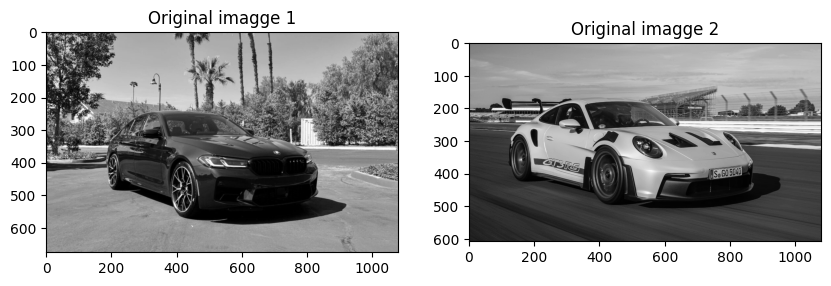

In [3]:
image1 = cv2.imread('BMW-M5-Competition.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('GT3-RS.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original imagge 1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Original imagge 2')

plt.show()

In [4]:
crop_size = (256, 256)

In [5]:
def crop_and_resize(image, size):
    h, w = image.shape
    center = (h // 2, w // 2)
    x = center[1] - size[1] // 2
    y = center[0] - size[0] // 2
    cropped = image[y:y+size[0], x:x+size[1]]
    resized = cv2.resize(cropped, size)
    return resized

In [6]:
# Crop and resize images
image1_cropped_resized = crop_and_resize(image1, crop_size)
image2_cropped_resized = crop_and_resize(image2, crop_size)

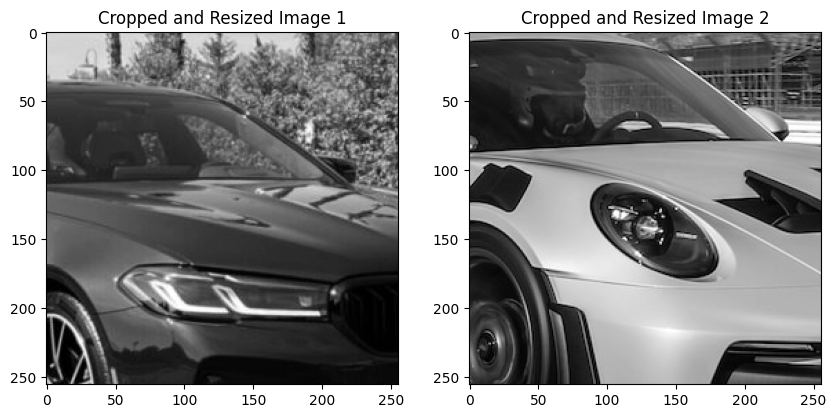

In [7]:
# Display the cropped and resized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1_cropped_resized, cmap='gray')
plt.title('Cropped and Resized Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2_cropped_resized, cmap='gray')
plt.title('Cropped and Resized Image 2')

plt.show()

### Transform Images to Frequency Domain using FFT

In [8]:
def fft_image(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)
    phase = np.angle(fshift)
    return magnitude, phase

In [9]:
# Transform images to frequency domain
magnitude1, phase1 = fft_image(image1_cropped_resized)
magnitude2, phase2 = fft_image(image2_cropped_resized)


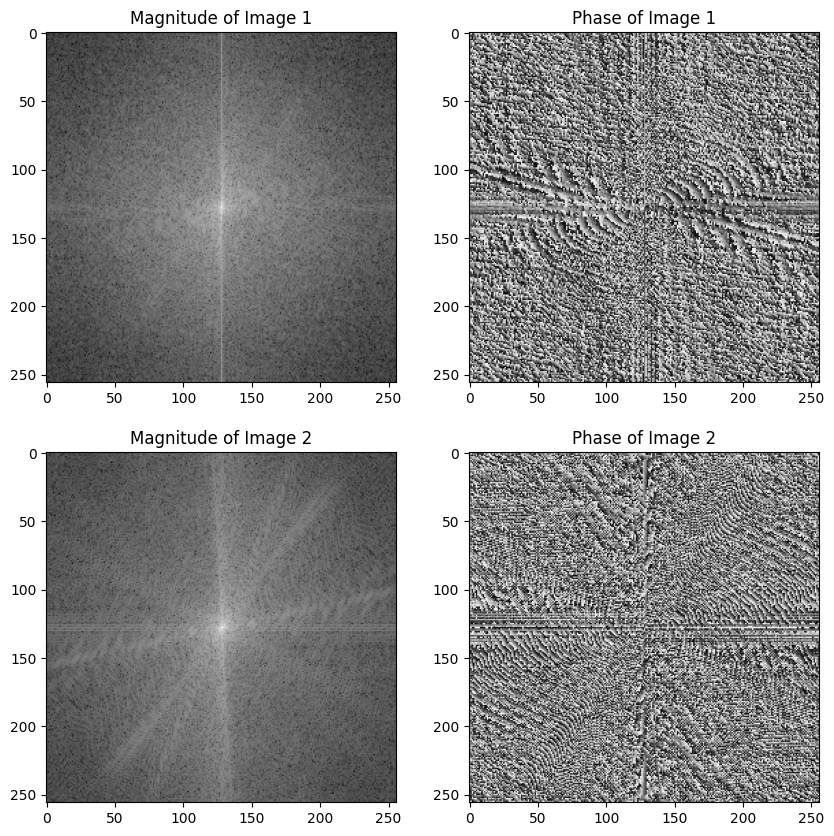

In [10]:
# Display magnitude and phase of both images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(np.log1p(magnitude1), cmap='gray')
plt.title('Magnitude of Image 1')

plt.subplot(2, 2, 2)
plt.imshow(phase1, cmap='gray')
plt.title('Phase of Image 1')

plt.subplot(2, 2, 3)
plt.imshow(np.log1p(magnitude2), cmap='gray')
plt.title('Magnitude of Image 2')

plt.subplot(2, 2, 4)
plt.imshow(phase2, cmap='gray')
plt.title('Phase of Image 2')

plt.show()

In [11]:
def combine_magnitude_phase(magnitude, phase):
    combined = magnitude * np.exp(1j * phase)
    combined_shift = np.fft.ifftshift(combined)
    img_back = np.fft.ifft2(combined_shift)
    img_back = np.abs(img_back)
    return img_back


In [12]:
# Combine magnitude of image 1 with phase of image 2
combined_image1 = combine_magnitude_phase(magnitude1, phase2)

# Combine magnitude of image 2 with phase of image 1
combined_image2 = combine_magnitude_phase(magnitude2, phase1)

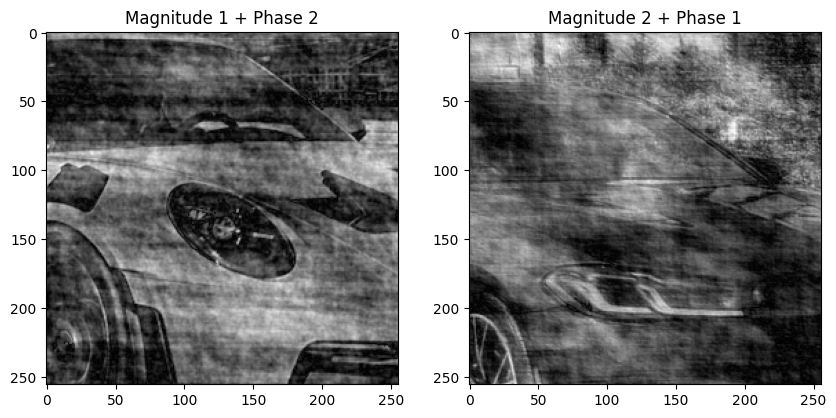

In [13]:
# Display the combined images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(combined_image1, cmap='gray')
plt.title('Magnitude 1 + Phase 2')

plt.subplot(1, 2, 2)
plt.imshow(combined_image2, cmap='gray')
plt.title('Magnitude 2 + Phase 1')

plt.show()